In [239]:
import torch
import numpy as np
import os

In [240]:
from torch.utils.data import Dataset,DataLoader
from torchvision import transforms,models,datasets
from PIL import Image

In [241]:
data_dir='./flower_data/'
train_dir=data_dir+'/train_filelist'
valid_dir=data_dir+'/valid_filelist'

In [242]:
from torch.utils.data import Dataset,DataLoader
class FlowerDataset(Dataset):
    def __init__(self,root_dir,ann_file,transform=None):
        self.root_dir=root_dir
        self.ann_file=ann_file
        self.img_label=self.load_annotations()
        self.img=[os.path.join(self.root_dir,img) for img in list(self.img_label.keys())]
        self.label=[label for label in list(self.img_label.values())]
        self.transform=transform

    def __len__(self):
        return len(self.img)
    
    def __getitem__(self,idx):
        image=Image.open(self.img[idx])
        label=self.label[idx]
        if self.transform:
            image=self.transform(image)
        label=torch.from_numpy(np.array(label))
        return image,label

    def load_annotations(self):
        data_infos={}
        with open(self.ann_file) as f:
            samples=[x.strip().split(' ') for x in f.readlines()]
            for filename,gt_label in samples:
                data_infos[filename]=np.array(gt_label,dtype=np.int64)
        return data_infos

In [243]:
data_transforms={
    'train':
    transforms.Compose([
        transforms.Resize(64),
        transforms.RandomRotation(45),
        transforms.CenterCrop(64),
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.RandomVerticalFlip(p=0.5),
        transforms.ColorJitter(brightness=0.2,contrast=0.1,saturation=0.1,hue=0.1),
        transforms.RandomGrayscale(p=0.025),
        transforms.ToTensor(),
        transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225]) # mean and std
    ]),

    'valid':
    transforms.Compose([
        transforms.Resize(64),
        transforms.CenterCrop(64),
        transforms.ToTensor(),
        transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225]),
    ])

}

In [244]:
train_dataset=FlowerDataset(root_dir=train_dir,ann_file='./flower_data/train.txt',transform=data_transforms['train'])
valid_dataset=FlowerDataset(root_dir=valid_dir,ann_file='./flower_data/val.txt',transform=data_transforms['valid'])

In [245]:
train_loader=DataLoader(dataset=train_dataset,batch_size=64,shuffle=True)
valid_loader=DataLoader(dataset=valid_dataset,batch_size=64,shuffle=True)

In [246]:
len(train_dataset),len(valid_dataset)

(6552, 818)

In [268]:
len(train_loader),len(valid_loader)
import matplotlib.pyplot as plt

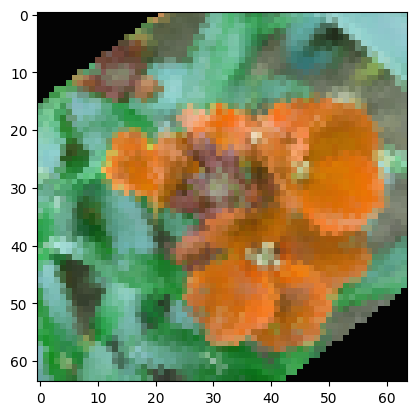

45


In [278]:
image, label = next(iter(train_loader))
sample=image[0]
sample=sample.permute(1,2,0).numpy()
sample*=[0.229,0.224,0.225]
sample+=[0.485,0.456,0.406]
plt.imshow(sample)
plt.show()
print(label[0].numpy())